2019.04.21 AI讀書會 Ian Fan ianfan0704@gamil.com

# 數據分析流程： 
## 提出問題 -> 數據前處理-> 特徵工程 -> 建立模型 -> 調整參數 -> 上線預測

# 數據前處理：
## 導入庫，讀入數據，查看數據，數據選取，可視化，數據清理，數據合併，數據處理，分組聚合，儲存數據

# 導入庫：

In [1]:
import numpy as np

import pandas as pd
from pandas import DataFrame
from pandas import Series
from pandas import Index

import matplotlib.pyplot as plt
%matplotlib inline

## Pandas:

### Pandas 通過帶有標籤的列和索引，可以從 csv 等類型的文件中導入數據，快速地進行複雜的轉換和過濾等操作

## Pandas 的數據類型：

### DataFrame: index索引、values數據、column索引
### Series: index索引、values數據
### Index: index索引

values數據可以是整數、浮點、字串、Python對象等

## DataFrame:

In [2]:
df = DataFrame([['value1', 'value2'], ['value3', 'value4']], columns=['Col_0', 'Col_1'], index=['Idx_0', 'Idx_1'])
print(df)
print()

        Col_0   Col_1
Idx_0  value1  value2
Idx_1  value3  value4



In [3]:
print('cloumn:')
print(df.columns)
print(type(df.columns))
print()

print('index:')
print(df.index)
print(type(df.index))
print()

print('values:')
print(df.values)
print(type(df.values))
print()

cloumn:
Index(['Col_0', 'Col_1'], dtype='object')
<class 'pandas.core.indexes.base.Index'>

index:
Index(['Idx_0', 'Idx_1'], dtype='object')
<class 'pandas.core.indexes.base.Index'>

values:
[['value1' 'value2']
 ['value3' 'value4']]
<class 'numpy.ndarray'>



In [4]:
df.index.name = 'INDEX'
df.columns.name = 'COLUMN'
df.name = 'DF'
print(df)
print()
print(df.name)

COLUMN   Col_0   Col_1
INDEX                 
Idx_0   value1  value2
Idx_1   value3  value4

DF


## Series:
## Index:

In [5]:
idx = Index(['Col_1', 'Col_2'], name='COLUMN')
sr1 = Series(["value1", "value2"], index=idx, name='idx0')
print('sr1:')
print(sr1)
print()

sr2 = Series(["value3", "value4"], index=idx, name='idx1')
print('sr2:')
print(sr2)
print()

df = DataFrame([sr1, sr2])
df.index.name = 'INDEX'
print(df)

sr1:
COLUMN
Col_1    value1
Col_2    value2
Name: idx0, dtype: object

sr2:
COLUMN
Col_1    value3
Col_2    value4
Name: idx1, dtype: object

COLUMN   Col_1   Col_2
INDEX                 
idx0    value1  value2
idx1    value3  value4


## 將自建數據給Dataframe的幾種方法
## HW3-1: 

In [6]:
# 第一種方法
data_dict = {'國家': ["Taiwan", "China", "USA", "Japan"],
             '人口': [0.26, 13.93, 3.29, 1.26]}
df = DataFrame(data_dict)
print(df)

# 第二種方法
data_array = [["Taiwan",0.26], 
              ["China",13.93], 
              ["USA", 3.29], 
              ["Japan", 1.26]]
df = DataFrame(data_array, columns=["國家", "人口"])
print(df)

# 第三種方法
sr1 = Series(["Taiwan", 0.26], index=["國家", "人口"], name=0)
sr2 = Series(["China", 13.93], index=["國家", "人口"], name=1)
sr3 = Series(["USA", 3.29], index=["國家", "人口"], name=2)
sr4 = Series(["Japan", 1.26], index=["國家", "人口"], name=3)
df = DataFrame([sr1, sr2, sr3, sr4])
print(df)

       國家     人口
0  Taiwan   0.26
1   China  13.93
2     USA   3.29
3   Japan   1.26
       國家     人口
0  Taiwan   0.26
1   China  13.93
2     USA   3.29
3   Japan   1.26
       國家     人口
0  Taiwan   0.26
1   China  13.93
2     USA   3.29
3   Japan   1.26


In [7]:
print(df.loc[df['人口'].idxmax(), '國家'])

China


# 讀入數據：

## HW3-2:

## 從 csv 讀入

In [8]:
import os

folder_path = './data'
file_path = os.path.join(folder_path, 'application_train.csv')
print('file path:', file_path)
df = pd.read_csv(file_path)

df.head()

# ./ 目前的檔案夾
# ../ 上一層檔案夾
# / 此碟槽的根目錄
# ~/ User目錄

file path: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 從 txt 讀入

In [9]:
# 從網路上抓
import requests
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'
response = requests.get(target_url)
data = response.text
print(type(data))
print(data[:100])

file_path = os.path.join('./data', 'response_text.txt')

# 儲存 txt
file = open(file_path, 'w')
file.write(data)
file.close()

# 從電腦裡讀
with open(file_path, 'r') as file:
    data = file.read()
    print(type(data))
    print(data[:100])

<class 'str'>
n00015388_157	http://farm1.static.flickr.com/145/430300483_21e993670c.jpg
n00015388_238	http://farm2
<class 'str'>
n00015388_157	http://farm1.static.flickr.com/145/430300483_21e993670c.jpg
n00015388_238	http://farm2


In [10]:
data_rows = data.split('\n')
print('data_rows:\n', data_rows[:2])

data_pd = []
for cols in data_rows:
    col = cols.split('\t')
    data_pd.append(col)
print('data_pd:\n', data_pd[:2])
    
df = pd.DataFrame(data_pd)

df.columns = ['name', 'address']

df.head()

data_rows:
 ['n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg', 'n00015388_238\thttp://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg']
data_pd:
 [['n00015388_157', 'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg'], ['n00015388_238', 'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg']]


,name,address
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 從 image 讀入

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg
http://farm1.static.flickr.com/145/430300483_21e993670c.jpg
http://farm1.static.flickr.com/145/430300483_21e993670c.jpg
numpy:  [[[ 81 110 150]
  [ 78 110 148]
  [ 75 111 145]
  ...
  [ 88 132 171]
  [ 88 132 171]
  [ 89 131 171]]]


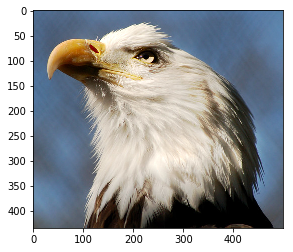

http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg
numpy:  [[[ 98  90  77]
  [ 98  90  77]
  [105  99  85]
  ...
  [ 45  41  30]
  [ 49  42  32]
  [ 50  43  33]]]


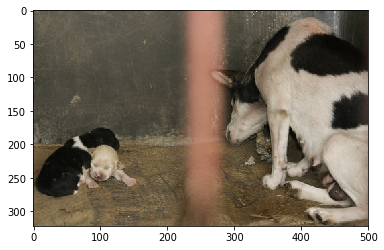

http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg
numpy:  [[[ 88 119  75]
  [113 143  93]
  [134 159 101]
  ...
  [143 141 128]
  [142 140 128]
  [142 139 130]]]


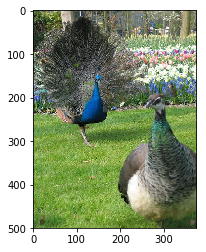

http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg
numpy:  [[[90 78 82]
  [82 70 74]
  [77 65 69]
  ...
  [70 56 45]
  [22  8  0]
  [13  0  0]]]


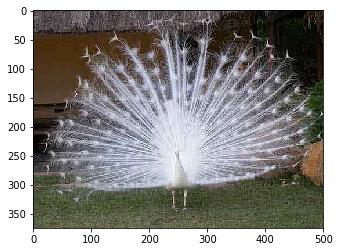

http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
error:  http://img100.imageshack.us/img100/3253/forrest004fs9.jpg


In [11]:
from PIL import Image
from io import BytesIO

def download_img_2_numpy(download_link):
    link = download_link
    print(link)
    try:
        response = requests.get(link)
        img = Image.open(BytesIO(response.content))
        # Convert img to numpy array
        img_np = np.array(img)
        print('numpy: ', img_np[:1][:1])
        plt.imshow(img)
        plt.show()
    except:
        print('error: ', link)

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0, 'address']
print(first_link)
first_link = df['address'][0]
print(first_link)

for i in range(5):
    download_img_2_numpy(df.loc[i, 'address'])

# 查看數據：

## HW2

In [12]:
data_array = [["Taiwan",0.26], 
              ["China",13.93], 
              ["USA", 3.29], 
              ["Japan", 1.26],
              ["France", 0.66],
              ["India", 12.81]]
df = DataFrame(data_array, columns=["國家", "人口"])
print(df)

       國家     人口
0  Taiwan   0.26
1   China  13.93
2     USA   3.29
3   Japan   1.26
4  France   0.66
5   India  12.81


In [13]:
print(df.head())
print(df.tail())

       國家     人口
0  Taiwan   0.26
1   China  13.93
2     USA   3.29
3   Japan   1.26
4  France   0.66
       國家     人口
1   China  13.93
2     USA   3.29
3   Japan   1.26
4  France   0.66
5   India  12.81


In [14]:
print(df.columns)

Index(['國家', '人口'], dtype='object')


In [15]:
print(df.index)

RangeIndex(start=0, stop=6, step=1)


In [16]:
print(df.shape)
# shape: Index數目、Column數目

(6, 2)


In [17]:
print(df.dtypes)

國家     object
人口    float64
dtype: object


In [18]:
print(df.describe())
print()

print(df.describe(include=['O'])) # O:Object
print()

print(df.describe(include='all'))
print()

              人口
count   6.000000
mean    5.368333
std     6.295107
min     0.260000
25%     0.810000
50%     2.275000
75%    10.430000
max    13.930000

         國家
count     6
unique    6
top     USA
freq      1

         國家         人口
count     6   6.000000
unique    6        NaN
top     USA        NaN
freq      1        NaN
mean    NaN   5.368333
std     NaN   6.295107
min     NaN   0.260000
25%     NaN   0.810000
50%     NaN   2.275000
75%     NaN  10.430000
max     NaN  13.930000



In [19]:
data_array = [["X", 1], 
              ["XL", 2], 
              ["M", 1], 
              ["XL", 1],
              ["L", 3],
              ["M", 1]]
df = DataFrame(data_array, columns=["尺寸", "件數"])

In [20]:
print(df["尺寸"].value_counts())
print()

print(df['件數'].value_counts())

XL    2
M     2
L     1
X     1
Name: 尺寸, dtype: int64

1    4
3    1
2    1
Name: 件數, dtype: int64


In [21]:
print(df["尺寸"].unique())

['X' 'XL' 'M' 'L']


# 數據選取：

## HW8

In [22]:
data_array = [["Taiwan",0.26], 
              ["China",13.93], 
              ["USA", 3.29], 
              ["Japan", 1.26],
              ["France", 0.66],
              ["India", 12.81]]
df = DataFrame(data_array, columns=["國家", "人口"])
print(df)

       國家     人口
0  Taiwan   0.26
1   China  13.93
2     USA   3.29
3   Japan   1.26
4  France   0.66
5   India  12.81


In [23]:
# loc、iloc，[]內兩個參數，第一個找Index、第二個找Column

print(df.loc[0, '國家'])

print(df.iloc[0, 0])

Taiwan
Taiwan


In [24]:
print(df.iloc[0, 0])

print(df.iloc[-1, -1])

Taiwan
12.81


In [25]:
sr = df.loc[0, :]
print(sr)
print(type(sr))
print()

# loc、iloc，[]內只有一個參數，則找Index
sr = df.loc[0]
print(sr)
print()

sr = df.iloc[0]
print(sr)
print(type(sr))

國家    Taiwan
人口      0.26
Name: 0, dtype: object
<class 'pandas.core.series.Series'>

國家    Taiwan
人口      0.26
Name: 0, dtype: object

國家    Taiwan
人口      0.26
Name: 0, dtype: object
<class 'pandas.core.series.Series'>


In [26]:
sr = df.loc[:, '國家']
print(sr)
print(type(sr))
print()

# []找 column
sr = df['國家']
print(sr)
print()

sr = df.國家
print(sr)

0    Taiwan
1     China
2       USA
3     Japan
4    France
5     India
Name: 國家, dtype: object
<class 'pandas.core.series.Series'>

0    Taiwan
1     China
2       USA
3     Japan
4    France
5     India
Name: 國家, dtype: object

0    Taiwan
1     China
2       USA
3     Japan
4    France
5     India
Name: 國家, dtype: object


In [27]:
sr = df.loc[::-1, "國家"]
print(sr)
print()

df_ = df.loc[:, ["人口", "國家"]]
print(df_)

5     India
4    France
3     Japan
2       USA
1     China
0    Taiwan
Name: 國家, dtype: object

      人口      國家
0   0.26  Taiwan
1  13.93   China
2   3.29     USA
3   1.26   Japan
4   0.66  France
5  12.81   India


In [28]:
sr = df.loc[[0, 2, 4, 6, 8], "國家"]
print(sr)
print()

sr = df.iloc[0:10:2, 0]
print(sr)

0    Taiwan
2       USA
4    France
6       NaN
8       NaN
Name: 國家, dtype: object

0    Taiwan
2       USA
4    France
Name: 國家, dtype: object


/Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/pandas/core/indexing.py:1027: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


In [29]:
sr = df['人口']
print(sr)
print()

sr = df['人口']>1
print(sr)
print()

df_ = df[df["人口"]>1]
print(df_)

0     0.26
1    13.93
2     3.29
3     1.26
4     0.66
5    12.81
Name: 人口, dtype: float64

0    False
1     True
2     True
3     True
4    False
5     True
Name: 人口, dtype: bool

      國家     人口
1  China  13.93
2    USA   3.29
3  Japan   1.26
5  India  12.81


In [30]:
df_ = df[(df["人口"]>1) & (df["人口"]<10)]
print(df_)
print()

df_ = df[(df["人口"]<1) | (df["人口"]>10)]
print(df_)

      國家    人口
2    USA  3.29
3  Japan  1.26

       國家     人口
0  Taiwan   0.26
1   China  13.93
4  France   0.66
5   India  12.81


In [31]:
df_ = df[~(df["人口"]>1)]
print(df_)

       國家    人口
0  Taiwan  0.26
4  France  0.66


In [32]:
df_ = df['國家'][df['人口']>1]
print(df_)

1    China
2      USA
3    Japan
5    India
Name: 國家, dtype: object


In [33]:
print(df['人口'])
print()

print(df['人口'].max())
print()

print(df['人口'].idxmax())
print()

print(df.loc[df['人口'].idxmax(), '國家'])
print()

print(np.percentile(df['人口'], q = 100))

0     0.26
1    13.93
2     3.29
3     1.26
4     0.66
5    12.81
Name: 人口, dtype: float64

13.93

1

China

13.93


In [34]:
sr = df[df['國家'].str.startswith('Tai')]
print(sr)
print()

sr = df[df['國家'].str.endswith('an')]
print(sr)
print()

sr = df[df['國家'].str.contains('Tai')]
print(sr)
print()

sr = df[(df['國家'].str.contains('a')) & (df['國家'].str.contains('n'))]
print(sr)
print()

sr = df[(df['國家'].str.contains('ai')) | (df['國家'].str.contains('an'))]
print(sr)

       國家    人口
0  Taiwan  0.26

       國家    人口
0  Taiwan  0.26
3   Japan  1.26

       國家    人口
0  Taiwan  0.26

       國家     人口
0  Taiwan   0.26
1   China  13.93
3   Japan   1.26
4  France   0.66
5   India  12.81

       國家    人口
0  Taiwan  0.26
3   Japan  1.26
4  France  0.66


In [37]:
df_sort_index = df.sort_index(ascending=False)
print(df_sort_index)
print()

df_sort_value = df.sort_values(by='人口', ascending=False)
print(df_sort_value)

       國家     人口
5   India  12.81
4  France   0.66
3   Japan   1.26
2     USA   3.29
1   China  13.93
0  Taiwan   0.26

       國家     人口
1   China  13.93
5   India  12.81
2     USA   3.29
3   Japan   1.26
4  France   0.66
0  Taiwan   0.26


In [38]:
df_ = df_sort_index.reset_index(drop=True)
print(df_)
print()

df_ = df_sort_index.reset_index()
print(df_)

       國家     人口
0   India  12.81
1  France   0.66
2   Japan   1.26
3     USA   3.29
4   China  13.93
5  Taiwan   0.26

   index      國家     人口
0      5   India  12.81
1      4  France   0.66
2      3   Japan   1.26
3      2     USA   3.29
4      1   China  13.93
5      0  Taiwan   0.26


# 可視化：

### 直方圖（Histogram）： plt.hist(values)
### 長條圖（Bar plot）：plt.bar(range(len(indexes)), values), plt.xticks(range(len(indexes)), labels)
### 散佈圖（Scatter plot）：plt.scatter(values1, values2)
### 線圖（Line plot）：plot(values1, values2)
### 盒鬚圖（Box plot）：boxplot(values)

## 直方圖
## HW5

In [167]:
data_array = [["L", 300], 
              ["S", 100], 
              ["M", 200],
              ["L", 250],
              ["M", 150],
              ["M", 200],
              ["L", 250],
              [np.nan, 150]]
df = DataFrame(data_array, columns=["Size", "Price"])
print(df)

  Size  Price
0    L    300
1    S    100
2    M    200
3    L    250
4    M    150
5    M    200
6    L    250
7  NaN    150


In [165]:
sr = df['Price']

print(sr.describe())
print()

print(sr.value_counts())

count      8.000000
mean     200.000000
std       65.465367
min      100.000000
25%      150.000000
50%      200.000000
75%      250.000000
max      300.000000
Name: Price, dtype: float64

150    2
250    2
200    2
300    1
100    1
Name: Price, dtype: int64


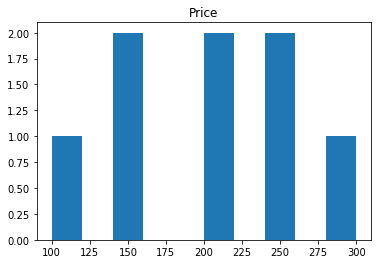

In [41]:
# 畫出任意欄位的直方圖
plt.hist(sr.values)
plt.title('Price') 
plt.show()

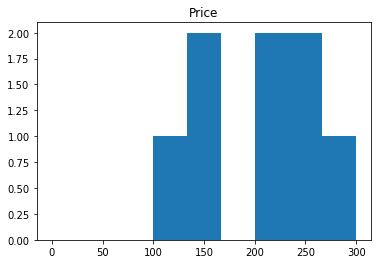

In [42]:
plt.hist(sr, bins = np.linspace(0, 300, 10)) 
plt.title('Price') 
plt.show()

M    3
L    3
S    1
Name: Size, dtype: int64


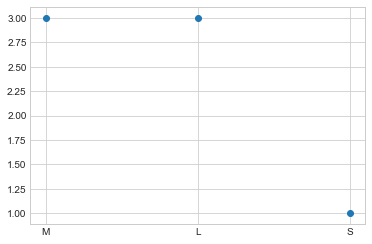

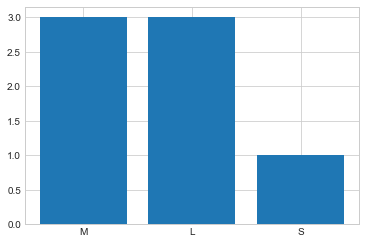

In [172]:
sr = df['Size'].value_counts()
print(sr)

plt.scatter(sr.index.values, sr.values)
plt.show()

plt.bar(range(len(sr.index)), sr.values)
plt.xticks(range(len(sr.index)), sr.index.values)
plt.show()

## Subplots
## HW14

In [45]:
data_array = [["L", 300], 
              ["S", 100], 
              ["M", 200],
              ["L", 250],
              ["M", 150],
              ["M", 200],
              ["L", 250],
              [np.nan, 150]]
df = DataFrame(data_array, columns=["Size", "Price"])
print(df)

  Size  Price
0    L    300
1    S    100
2    M    200
3    L    250
4    M    150
5    M    200
6    L    250
7  NaN    150


In [46]:
value_count = df['Size'].value_counts()
print(value_count)
print()

unique = df['Size'].unique()
print(unique)

M    3
L    3
S    1
Name: Size, dtype: int64

['L' 'S' 'M' nan]


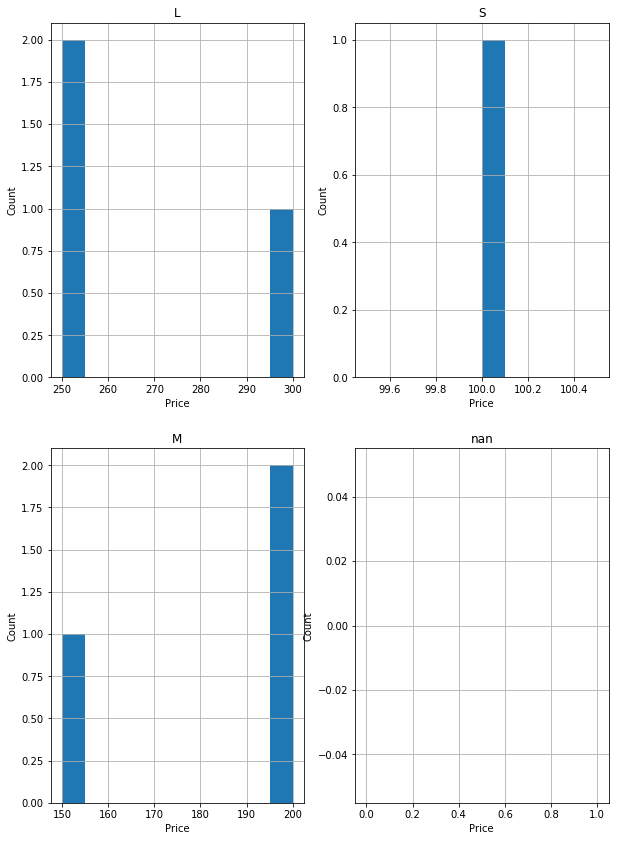

In [47]:
unique = df['Size'].unique()

nrows = len(unique)
ncols = nrows // 2

plt.figure(figsize=(10,30))
for i in range(len(unique)):
    plt.subplot(nrows, ncols, i+1)
    df.loc[df['Size'] == unique[i], "Price"].hist()
    plt.xlabel('Price')
    plt.ylabel('Count')
    plt.title(str(unique[i]))
plt.show()   

## 相關係數

## df.corr()
## HW10

In [48]:
data_array = [[10, 18, 60, 10], 
              [40, 50, 27, 9],
              [20, 27, 40, 50], 
              [50, 70, 20, 15],
              [30, 39, 31, 36]]
df = DataFrame(data_array, columns=["strenth", "hp", "agility", "lucky"])
print(df)

   strenth  hp  agility  lucky
0       10  18       60     10
1       40  50       27      9
2       20  27       40     50
3       50  70       20     15
4       30  39       31     36


In [49]:
corr = df.corr()
print(type(corr))
print(corr)
print()

corr_sr = df.corr()['strenth']
print(corr_sr)

<class 'pandas.core.frame.DataFrame'>
          strenth        hp   agility     lucky
strenth  1.000000  0.988454 -0.952557 -0.269616
hp       0.988454  1.000000 -0.911505 -0.312737
agility -0.952557 -0.911505  1.000000 -0.011581
lucky   -0.269616 -0.312737 -0.011581  1.000000

strenth    1.000000
hp         0.988454
agility   -0.952557
lucky     -0.269616
Name: strenth, dtype: float64


In [50]:
# 排序
order = corr_sr.map(lambda x : x).abs().sort_values(ascending = False)
sort_corr = corr_sr[order.index]
print(sort_corr)

strenth    1.000000
hp         0.988454
agility   -0.952557
lucky     -0.269616
Name: strenth, dtype: float64


## np.corrcoef(x, y)
## HW9

In [51]:
data_array = [[10, 18, 60, 10], 
              [40, 50, 27, 9],
              [20, 27, 40, 50], 
              [50, 70, 20, 15],
              [30, 39, 31, 36]]
df = DataFrame(data_array, columns=["strenth", "hp", "agility", "lucky"])
print(df)

corr = df.corr()
print(corr)
print()

   strenth  hp  agility  lucky
0       10  18       60     10
1       40  50       27      9
2       20  27       40     50
3       50  70       20     15
4       30  39       31     36
          strenth        hp   agility     lucky
strenth  1.000000  0.988454 -0.952557 -0.269616
hp       0.988454  1.000000 -0.911505 -0.312737
agility -0.952557 -0.911505  1.000000 -0.011581
lucky   -0.269616 -0.312737 -0.011581  1.000000



## 正相關

[[1.         0.98845406]
 [0.98845406 1.        ]]


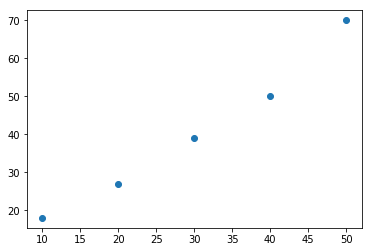

In [52]:
corrcoef = np.corrcoef(df['strenth'], df['hp'])
print(corrcoef)

plt.scatter(df['strenth'], df['hp'])
plt.show()

## 負相關

[[ 1.         -0.95255691]
 [-0.95255691  1.        ]]


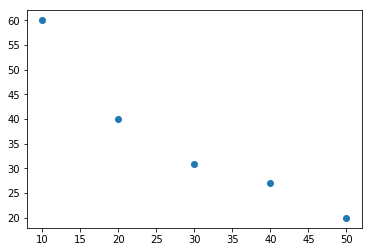

In [53]:
corrcoef = np.corrcoef(df['strenth'], df['agility'])
print(corrcoef)

plt.scatter(df['strenth'], df['agility'])
plt.show()

## 弱相關

[[ 1.         -0.26961619]
 [-0.26961619  1.        ]]


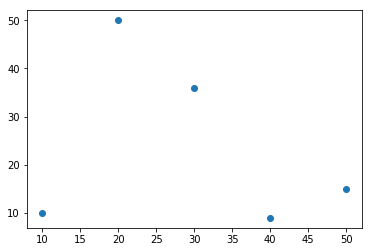

In [54]:
corrcoef = np.corrcoef(df['strenth'], df['lucky'])
print(corrcoef)

plt.scatter(df['strenth'], df['lucky'])
plt.show()

## HW15

## Seaborn 
### 基於 matplotlib 的 Python 可視化庫，為 matplotlib 的補充，而不是替代

### sns.heatmap()
### sns.kdeplot()
### sns.distplot()
### sns.FacetGrid()
### sns.PairGrid()

In [55]:
import seaborn as sns # 另一個繪圖套件

In [56]:
data_array = [[10, 18, 60, 10], 
              [40, 50, 27, 9],
              [20, 27, 40, 50], 
              [50, 70, 20, 15],
              [30, 39, 31, 36]]
df = DataFrame(data_array, columns=["strenth", "hp", "agility", "lucky"])
print(df)
print()

corr = df.corr()
print(corr)

   strenth  hp  agility  lucky
0       10  18       60     10
1       40  50       27      9
2       20  27       40     50
3       50  70       20     15
4       30  39       31     36

          strenth        hp   agility     lucky
strenth  1.000000  0.988454 -0.952557 -0.269616
hp       0.988454  1.000000 -0.911505 -0.312737
agility -0.952557 -0.911505  1.000000 -0.011581
lucky   -0.269616 -0.312737 -0.011581  1.000000


## heatmap

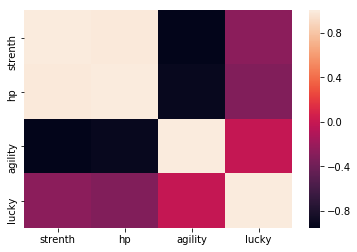

In [57]:
heatmap = sns.heatmap(corr)
plt.show()

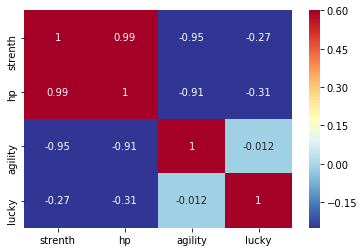

In [58]:
heatmap = sns.heatmap(corr, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.show()

## kdeplot
### kdeplot(核密度估計圖)：概率論中用來估計未知的密度函數，可以比較直觀的看出數據樣本本身的分布特徵

/Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


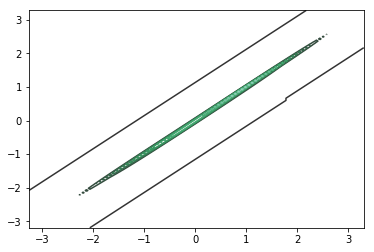

In [59]:
sns.kdeplot(corr)

## distplot
### displot()集合了matplotlib的hist()與核函數估計kdeplot的功能，增加了rugplot分布觀測條顯示與利用scipy庫fit擬合參數分布的新穎用途

/Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


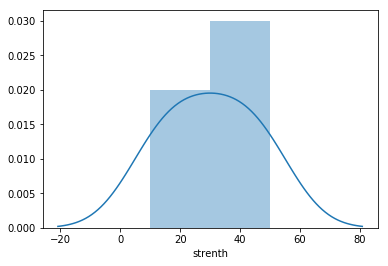

In [60]:
sns.distplot(df['strenth'])

## FacetGrid
### 每張圖表現的都是同樣的變量關係，只是每張圖對應著不同的數據子集
### 數據子集的劃分是由我們指定的維度變量決定的（col、row和hue）

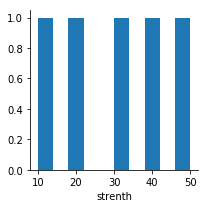

In [61]:
# 首先初始化網格
grid = sns.FacetGrid(df)
# 然後繪圖
grid.map(plt.hist, "strenth");

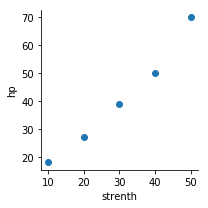

In [62]:
grid = sns.FacetGrid(df)
grid.map(plt.scatter, 'strenth', 'hp')

/Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'color'
  s)


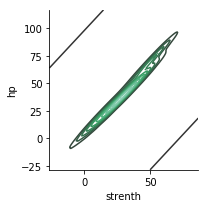

In [63]:
grid = sns.FacetGrid(df)
grid.map(sns.kdeplot, 'strenth', 'hp')

## PairGrid
### 每張子圖都代表了不同的兩個變量間的關係
### 可以對於我們數據集中的變量關係提供一個快速的總結

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


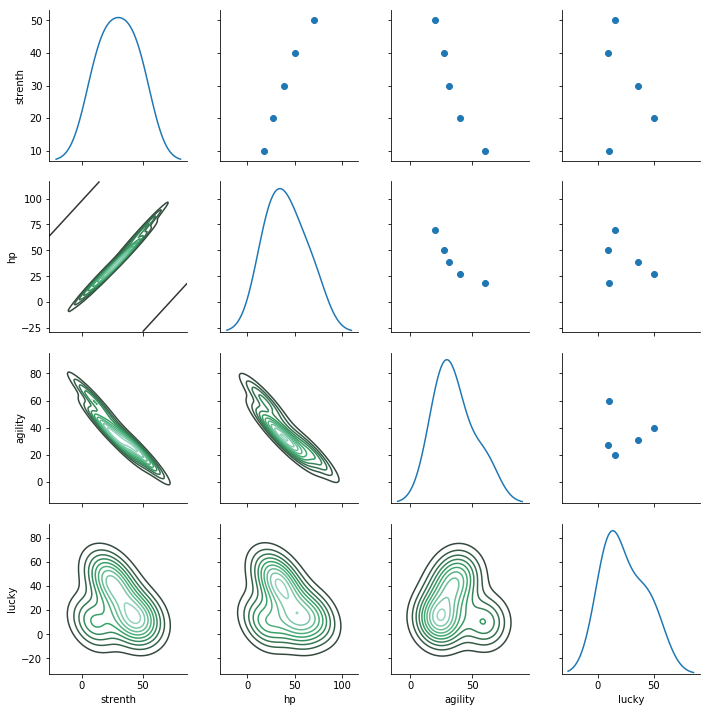

In [64]:
# 首先初始化網格
grid = sns.PairGrid(data = df, size = 2.5, diag_sharey=False)

# 然後繪圖
grid.map_upper(plt.scatter)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot)
plt.show()

# map_upper：畫上半部
# map_lower ：畫下半部
# map_diag：畫對角線

## 觀察單特徵

  Size  Price
0    L    300
1    S    100
2    M    200
3    L    250
4    M    150
5    M    200
6    M    220
7  NaN    150


/Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


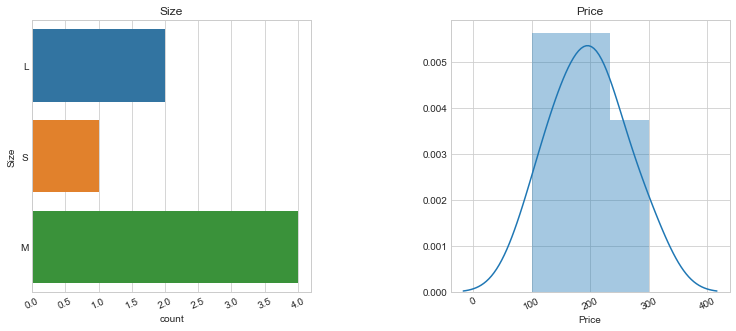

In [65]:
data_array = [["L", 300], 
              ["S", 100], 
              ["M", 200],
              ["L", 250],
              ["M", 150],
              ["M", 200],
              ["M", 220],
              [np.nan, 150]]
df = DataFrame(data_array, columns=["Size", "Price"])
print(df)

# 單特徵展示
import math
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            #直方圖，頻數
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(df, cols=3, width=20, height=5, hspace=0.45, wspace=0.5)

## missingno 
### 畫出缺失值

   Sale1  Sale2  Sale3
0  100.0   10.0    NaN
1    NaN    NaN    3.0
2  110.0   20.0    5.0
3   40.0    NaN    6.0
4   40.0   30.0    NaN

Sale1    1
Sale2    2
Sale3    2
dtype: int64


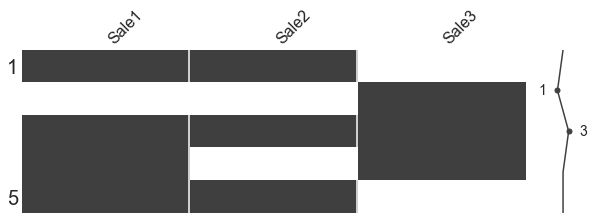

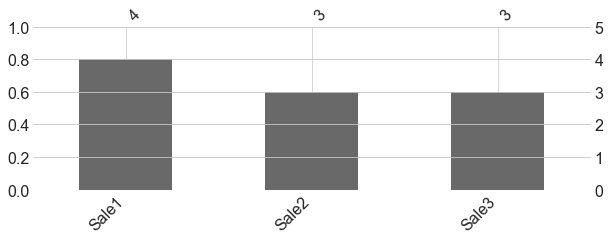

In [69]:
import missingno

data_array = [[100, 10, np.nan], 
              [np.nan, np.nan, 3], 
              [110, 20, 5], 
              [40, np.nan, 6],
              [40, 30, np.nan]]
df = DataFrame(data_array, columns=["Sale1", "Sale2", 'Sale3'])
print(df)
print()

print(df.isnull().sum())

missingno.matrix(df, figsize = (10,3))

missingno.bar(df, sort='ascending', figsize = (10,3))

# 數據清理：

## 處理異常值 Anomaly：

### 離群點: 這些點可能會對結果產生影響，先把它們找出來
### 缺失值: 對缺失值進行填充
### 錯誤值: 比如人的年齡不可能出現負數
### 特殊值: 一些錯誤導致的特殊值，例如 ±Inf, NA NaN

## 離群值（極端值）Outlier
## HW6

In [70]:
data_array = [[80, 50], 
              [50, 100000], 
              [50, -20],
              [20, 10]]
df = DataFrame(data_array, columns=["Sale1", "Sale2"])
print(df)
print()

print(df.describe())

   Sale1   Sale2
0     80      50
1     50  100000
2     50     -20
3     20      10

           Sale1          Sale2
count   4.000000       4.000000
mean   50.000000   25010.000000
std    24.494897   49993.341557
min    20.000000     -20.000000
25%    42.500000       2.500000
50%    50.000000      30.000000
75%    57.500000   25037.500000
max    80.000000  100000.000000


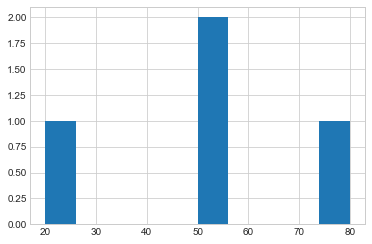

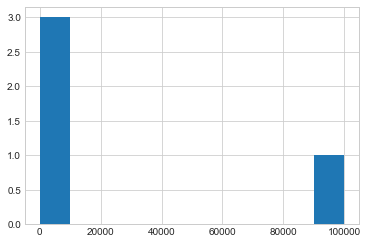

In [71]:
plt.hist(df['Sale1'])
plt.show()

plt.hist(df['Sale2'])
plt.show()

In [72]:
print(df['Sale2'].value_counts())
print()

# 取代極端值
df_ = df['Sale2']
df_ = df_.replace({100000: 100})
print(df_)

 10        1
-20        1
 50        1
 100000    1
Name: Sale2, dtype: int64

0     50
1    100
2    -20
3     10
Name: Sale2, dtype: int64


### 箱線圖（Boxplot）
#### 利用數據中的五個統計量：最小值(min)、第一四分位數(25%)、中位數(mean)、第三四分位數(75%)與最大值(max)來描述數據的一種方法
#### 它也可以粗略地看出數據是否具有有對稱性，分布的分散程度等信息，特別可以用於對幾個樣本的比較

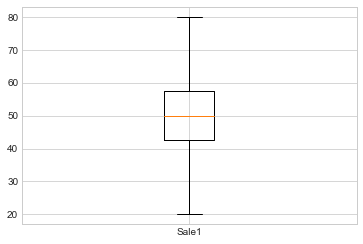

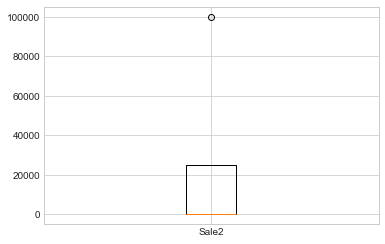

In [73]:
# 檢視這些欄位的數值範圍
for col in df.columns:
    plt.boxplot(df[col].values, labels=[col])
    plt.show()

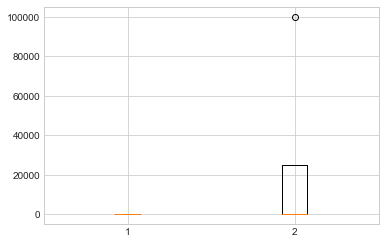

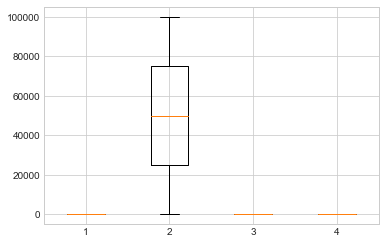

In [74]:
# 錯誤用法
plt.boxplot(df.values)
plt.show()

plt.boxplot(df)
plt.show()

### ECDF 方法 (Emprical Cumulative Density Plot)

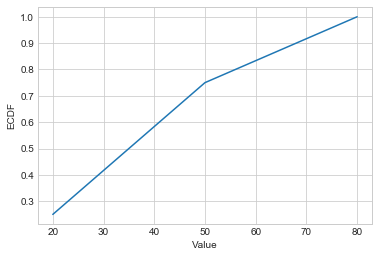

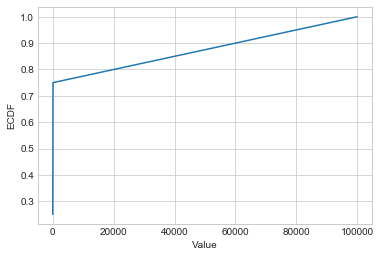

In [75]:
cdf = df['Sale1'].value_counts().sort_index().cumsum()

plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.show()

cdf = df['Sale2'].value_counts().sort_index().cumsum()

plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.show()

In [77]:
print(df['Sale1'])
print()

print(df['Sale1'].cumsum())
print()

print(df['Sale1'].value_counts())
print()

print(df['Sale1'].value_counts().sort_index())
print()

print(df['Sale1'].value_counts().sort_index().cumsum())

0    80
1    50
2    50
3    20
Name: Sale1, dtype: int64

0     80
1    130
2    180
3    200
Name: Sale1, dtype: int64

50    2
20    1
80    1
Name: Sale1, dtype: int64

20    1
50    2
80    1
Name: Sale1, dtype: int64

20    1
50    3
80    4
Name: Sale1, dtype: int64


## 缺失值
### 均值填充：這樣可以不改變當前數據集整體的均值
### 回歸模型預測：建立一個回歸模型去得到預測值
### 額外的數據補充：有點難弄

In [78]:
data_array = [[100, 10], 
              [np.nan, np.nan], 
              [110, 20], 
              [40, np.nan],
              [40, 30]]
df = DataFrame(data_array, columns=["Sale1", "Sale2"])
print(df)

   Sale1  Sale2
0  100.0   10.0
1    NaN    NaN
2  110.0   20.0
3   40.0    NaN
4   40.0   30.0


In [79]:
print(df.isnull())
print()

print(df.isnull().sum())

   Sale1  Sale2
0  False  False
1   True   True
2  False  False
3  False   True
4  False  False

Sale1    1
Sale2    2
dtype: int64


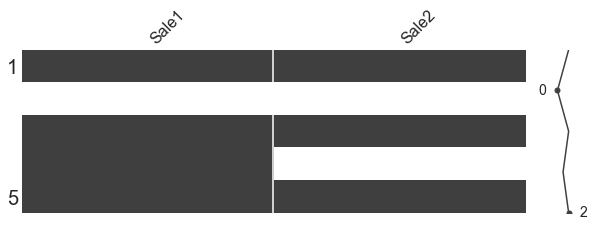

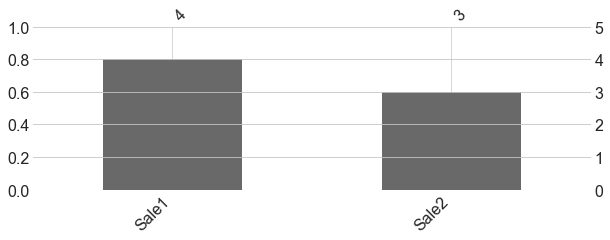

In [80]:
import missingno

missingno.matrix(df, figsize = (10,3))

missingno.bar(df, sort='ascending', figsize = (10,3))

In [81]:
print(df)
print()

# 刪除包含空值的Index
df_ = df.dropna()
print(df_)
print()

# 刪除包含空值的Column
df_ = df.dropna(axis=1)
print(df_)

   Sale1  Sale2
0  100.0   10.0
1    NaN    NaN
2  110.0   20.0
3   40.0    NaN
4   40.0   30.0

   Sale1  Sale2
0  100.0   10.0
2  110.0   20.0
4   40.0   30.0

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [82]:
# 用0填滿Nan

df_ = df.fillna(0)
print(df_)

   Sale1  Sale2
0  100.0   10.0
1    0.0    0.0
2  110.0   20.0
3   40.0    0.0
4   40.0   30.0


In [83]:
# 用平均數填滿Nan

df_ = df.fillna(df.mean())
print(df_)
print()

   Sale1  Sale2
0  100.0   10.0
1   72.5   20.0
2  110.0   20.0
3   40.0   20.0
4   40.0   30.0



In [84]:
# 用眾數填滿Nan (若有數個眾數，則數個眾數再求平均)

print('Sale1眾數:')
print(df['Sale1'].mode())
print()
print('Sale2眾數:')
print(df['Sale2'].mode())
print()

df_ = df.fillna(df.mode().mean())
print(df_)
print()

# from scipy.stats import mode
# value_most = mode(df[~df['銷售數量1'].isnull()]['銷售數量1'])
# print(value_most)

Sale1眾數:
0    40.0
dtype: float64

Sale2眾數:
0    10.0
1    20.0
2    30.0
dtype: float64

   Sale1  Sale2
0  100.0   10.0
1   40.0   20.0
2  110.0   20.0
3   40.0   20.0
4   40.0   30.0



In [85]:
# 用q值填滿Nan

print(df['Sale1'])
print()

q = np.percentile(df[~df['Sale1'].isnull()]['Sale1'], q = 75)
print(q)
print()

sr = df['Sale1'].fillna(q)
print(sr)

0    100.0
1      NaN
2    110.0
3     40.0
4     40.0
Name: Sale1, dtype: float64

102.5

0    100.0
1    102.5
2    110.0
3     40.0
4     40.0
Name: Sale1, dtype: float64


## 錯誤值

   銷售數量
0   100
1    -1
2    50
3    50
4    -1

 50     2
-1      2
 100    1
Name: 銷售數量, dtype: int64


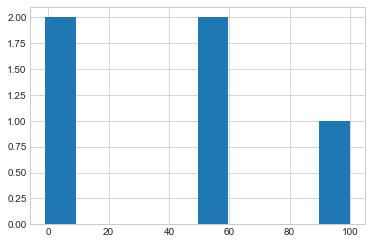

In [96]:
data_array = [[100], 
              [-1], 
              [50],
              [50],
              [-1]]
df = DataFrame(data_array, columns=["銷售數量"])
print(df)
print()

print(df['銷售數量'].value_counts())

plt.hist(df.values)
plt.show()

In [97]:
# 取代錯誤值

df_ = df["銷售數量"].replace({-1: 0})
print(df_)
print()

df_ = df.copy()
df_[df_["銷售數量"]<0] = 0
print(df_)

0    100
1      0
2     50
3     50
4      0
Name: 銷售數量, dtype: int64

   銷售數量
0   100
1     0
2    50
3    50
4     0


In [101]:
# 刪除錯誤值

print(df.shape)
print()

print(df["銷售數量"]>0)
print()

df_ = df.loc[df["銷售數量"]>0, :]
print(df_)
print()

df_ = df_.reset_index(drop=True)
print(df_)
print()

print(df_.shape)

(5, 1)

0     True
1    False
2     True
3     True
4    False
Name: 銷售數量, dtype: bool

   銷售數量
0   100
2    50
3    50

   銷售數量
0   100
1    50
2    50

(3, 1)


## 重複值

In [102]:
df = pd.DataFrame({'A': [0, 1, 1, 3],
                   'B': [0, 2, 3, 1]})
print(df)
print()

df_ = df.drop_duplicates(subset=['A'], keep='first')
print(df_)

   A  B
0  0  0
1  1  2
2  1  3
3  3  1

   A  B
0  0  0
1  1  2
3  3  1


In [103]:
df = pd.DataFrame({'A': [0, 1, 1, 3],
                   'B': [0, 1, 1, 3]})
print(df)
print()

df_ = df.drop_duplicates(subset=['A', 'B'], keep='first')
print(df_)
print()

df_ = df.drop_duplicates(subset=None, keep='first')
print(df_)

   A  B
0  0  0
1  1  1
2  1  1
3  3  3

   A  B
0  0  0
1  1  1
3  3  3

   A  B
0  0  0
1  1  1
3  3  3


# 數據合併：

## 簡單的合併刪除

In [104]:
df1 = pd.DataFrame({'A': ['A0', 'A1']})
df2 = pd.DataFrame({'A': ['A1', 'A3']})

print('df1')
print(df1)
print()

print('df2')
print(df2)
print()

df_ = df1.append(df2)
print(df_)
print()

df_ = df_.reset_index(drop=True)
print(df_)

df1
    A
0  A0
1  A1

df2
    A
0  A1
1  A3

    A
0  A0
1  A1
0  A1
1  A3

    A
0  A0
1  A1
2  A1
3  A3


In [105]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3']})
df2 = pd.DataFrame({'B': ['B0', 'B1', 'B2', 'B3']})

print('df1')
print(df1)
print()

print('df2')
print(df2)
print()

df_ = df1.copy()
df_['B'] = df2['B']
print(df_)

df1
    A
0  A0
1  A1
2  A2
3  A3

df2
    B
0  B0
1  B1
2  B2
3  B3

    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


In [106]:
df = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                   'B': ['B0', 'B1', 'B2', 'B3']})
print(df)
print()

df_ = df.drop(0)
print(df_)

    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3

    A   B
1  A1  B1
2  A2  B2
3  A3  B3


In [107]:
df = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                   'B': ['B0', 'B1', 'B2', 'B3']})
print(df)
print()

df_ = df.drop('A', axis=1)
print(df_)

    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3

    B
0  B0
1  B1
2  B2
3  B3


## concat、merge
## concat可以將數據根據不同的軸作簡單的融合
## merge方法提供了一種類似於SQL的內存鏈接操作
## HW8

## pd.concat( [ , ] )
### 沿著一條軸，將多個對象堆疊到一起

In [108]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

In [109]:
# 沿縱軸合併

print('df1')
print(df1)
print()

print('df2')
print(df2)
print()

df_ = pd.concat([df1, df2])
print(df_)
print()

df1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3

df2
    A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7



In [110]:
df_ = pd.concat([df1, df2])
print(df_)
print()

df_ = df1.append(df2)
print(df_)

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7


In [111]:
# 沿縱軸合併，相同字段的表首尾相接

print('df1')
print(df1)
print()

print('df3')
print(df3)
print()

df_ = pd.concat([df1, df3])
print(df_)
print()

df1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3

df3
    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7

     A   B    C   D    F
0   A0  B0   C0  D0  NaN
1   A1  B1   C1  D1  NaN
2   A2  B2   C2  D2  NaN
3   A3  B3   C3  D3  NaN
2  NaN  B2  NaN  D2   F2
3  NaN  B3  NaN  D3   F3
6  NaN  B6  NaN  D6   F6
7  NaN  B7  NaN  D7   F7



/Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


In [112]:
# outer 保留兩個表的所有信息
# inner 只保留兩個表中公共部分的信息

print('df1')
print(df1)
print()

print('df3')
print(df3)
print()

df_ = pd.concat([df1, df3], join='outer')
print(df_)
print()

df_ = pd.concat([df1, df3], join='inner')
print(df_)

df1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3

df3
    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7

     A   B    C   D    F
0   A0  B0   C0  D0  NaN
1   A1  B1   C1  D1  NaN
2   A2  B2   C2  D2  NaN
3   A3  B3   C3  D3  NaN
2  NaN  B2  NaN  D2   F2
3  NaN  B3  NaN  D3   F3
6  NaN  B6  NaN  D6   F6
7  NaN  B7  NaN  D7   F7

    B   D
0  B0  D0
1  B1  D1
2  B2  D2
3  B3  D3
2  B2  D2
3  B3  D3
6  B6  D6
7  B7  D7


/Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


In [113]:
# key來識別數據源自於哪張表

print('df1')
print(df1)
print()

print('df3')
print(df3)
print()

df_ = pd.concat([df1, df3], keys=['x', 'y'])
print(df_)
print()

df1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3

df3
    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7

       A   B    C   D    F
x 0   A0  B0   C0  D0  NaN
  1   A1  B1   C1  D1  NaN
  2   A2  B2   C2  D2  NaN
  3   A3  B3   C3  D3  NaN
y 2  NaN  B2  NaN  D2   F2
  3  NaN  B3  NaN  D3   F3
  6  NaN  B6  NaN  D6   F6
  7  NaN  B7  NaN  D7   F7



/Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


In [114]:
# 沿橫軸合併

print('df1')
print(df1)
print()

print('df2')
print(df2)
print()

df_ = pd.concat([df1, df2], axis = 1)
print(df_)

df1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3

df2
    A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7

     A    B    C    D    A    B    C    D
0   A0   B0   C0   D0  NaN  NaN  NaN  NaN
1   A1   B1   C1   D1  NaN  NaN  NaN  NaN
2   A2   B2   C2   D2  NaN  NaN  NaN  NaN
3   A3   B3   C3   D3  NaN  NaN  NaN  NaN
4  NaN  NaN  NaN  NaN   A4   B4   C4   D4
5  NaN  NaN  NaN  NaN   A5   B5   C5   D5
6  NaN  NaN  NaN  NaN   A6   B6   C6   D6
7  NaN  NaN  NaN  NaN   A7   B7   C7   D7


In [115]:
# 沿橫軸合併

print('df1')
print(df1)
print()

print('df3')
print(df3)
print()

df_ = pd.concat([df1, df3], axis = 1)
print(df_)

df1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3

df3
    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7

     A    B    C    D    B    D    F
0   A0   B0   C0   D0  NaN  NaN  NaN
1   A1   B1   C1   D1  NaN  NaN  NaN
2   A2   B2   C2   D2   B2   D2   F2
3   A3   B3   C3   D3   B3   D3   F3
6  NaN  NaN  NaN  NaN   B6   D6   F6
7  NaN  NaN  NaN  NaN   B7   D7   F7


In [116]:
# outer 保留兩個表的所有信息
# inner 只保留兩個表中公共部分的信息

# 沿橫軸合併
df_ = pd.concat([df1, df3], axis = 1, join='outer')
print(df_)
print()

# 沿橫軸合併
df_ = pd.concat([df1, df3], axis = 1, join='inner')
print(df_)

     A    B    C    D    B    D    F
0   A0   B0   C0   D0  NaN  NaN  NaN
1   A1   B1   C1   D1  NaN  NaN  NaN
2   A2   B2   C2   D2   B2   D2   F2
3   A3   B3   C3   D3   B3   D3   F3
6  NaN  NaN  NaN  NaN   B6   D6   F6
7  NaN  NaN  NaN  NaN   B7   D7   F7

    A   B   C   D   B   D   F
2  A2  B2  C2  D2  B2  D2  F2
3  A3  B3  C3  D3  B3  D3  F3


In [117]:
# 沿橫軸合併

print('df1')
print(df1)
print()

print('df3')
print(df3)
print()

df_ = pd.concat([df1, df3], axis = 1, keys=['x', 'y'])
print(df_)

df1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3

df3
    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7

     x                   y          
     A    B    C    D    B    D    F
0   A0   B0   C0   D0  NaN  NaN  NaN
1   A1   B1   C1   D1  NaN  NaN  NaN
2   A2   B2   C2   D2   B2   D2   F2
3   A3   B3   C3   D3   B3   D3   F3
6  NaN  NaN  NaN  NaN   B6   D6   F6
7  NaN  NaN  NaN  NaN   B7   D7   F7


## pd.merge( [ , ] )
### 類似於SQL的內存鏈接操作，把左表與右表做鍵拼接列

In [118]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

In [119]:
print('df1')
print(df1)
print()

print('df3')
print(df3)
print()

df_ = pd.merge(df1, df3)
print(df_)
print()

df1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3

df3
    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7

    A   B   C   D   F
0  A2  B2  C2  D2  F2
1  A3  B3  C3  D3  F3



In [120]:
# outer 保留兩個表的所有信息
# inner 只保留兩個表中公共部分的信息

print('df1')
print(df1)
print()

print('df3')
print(df3)
print()

df_ = pd.merge(df1, df3, how='inner')
print(df_)
print()

df_ = pd.merge(df1, df3, how='outer')
print(df_)
print()

df1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3

df3
    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7

    A   B   C   D   F
0  A2  B2  C2  D2  F2
1  A3  B3  C3  D3  F3

     A   B    C   D    F
0   A0  B0   C0  D0  NaN
1   A1  B1   C1  D1  NaN
2   A2  B2   C2  D2   F2
3   A3  B3   C3  D3   F3
4  NaN  B6  NaN  D6   F6
5  NaN  B7  NaN  D7   F7



In [121]:
print('df1')
print(df1)
print()

print('df3')
print(df3)
print()

df_ = pd.merge(df1, df3, how='left')
print(df_)
print()

df_ = pd.merge(df1, df3, how='right')
print(df_)
print()

df1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3

df3
    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7

    A   B   C   D    F
0  A0  B0  C0  D0  NaN
1  A1  B1  C1  D1  NaN
2  A2  B2  C2  D2   F2
3  A3  B3  C3  D3   F3

     A   B    C   D   F
0   A2  B2   C2  D2  F2
1   A3  B3   C3  D3  F3
2  NaN  B6  NaN  D6  F6
3  NaN  B7  NaN  D7  F7



In [122]:
print('df1')
print(df1)
print()

print('df3')
print(df3)
print()

df_ = pd.merge(df1, df3, on=['B'])
print(df_)
print()

df1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3

df3
    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7

    A   B   C D_x D_y   F
0  A2  B2  C2  D2  D2  F2
1  A3  B3  C3  D3  D3  F3



## melt ()
### 將column、index、value逐一解開

In [123]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])
print('df1')
print(df1)
print()

print(df1.melt())

df1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3

   variable value
0         A    A0
1         A    A1
2         A    A2
3         A    A3
4         B    B0
5         B    B1
6         B    B2
7         B    B3
8         C    C0
9         C    C1
10        C    C2
11        C    C3
12        D    D0
13        D    D1
14        D    D2
15        D    D3


## pivot_table()
### 透視表

In [124]:
df1 = pd.DataFrame({'ID': ['001', '002', '001', '002', '003', '003'],
                    'Name': ['Sam', 'Tom', 'Sam', 'Tom', 'John', 'John'],
                    'Sub': ['Eng', 'Eng', 'Math', 'Math', 'His', 'Eng'],
                    'Score': [100, 30, 80, 60, 90, 70],},
                   index=[0, 1, 2, 3, 4, 5])
print('df1')
print(df1)
print()

pt = df1.pivot_table(index=['ID', 'Name'], columns='Sub', values='Score')
print(pt)
print()

print(pt.shape)
print(pt.index)

df1
    ID  Name   Sub  Score
0  001   Sam   Eng    100
1  002   Tom   Eng     30
2  001   Sam  Math     80
3  002   Tom  Math     60
4  003  John   His     90
5  003  John   Eng     70

Sub         Eng   His  Math
ID  Name                   
001 Sam   100.0   NaN  80.0
002 Tom    30.0   NaN  60.0
003 John   70.0  90.0   NaN

(3, 3)
MultiIndex(levels=[['001', '002', '003'], ['John', 'Sam', 'Tom']],
           labels=[[0, 1, 2], [1, 2, 0]],
           names=['ID', 'Name'])


# 數據處理：

## 轉換型態

In [125]:
data_array = [[1]]
df = DataFrame(data_array, columns=['Col'])
print(df)
print()

print(df['Col'].dtype)
print()

# int64 -> float64
df['Col'] = df['Col'].astype(float)
print(df['Col'].dtype)

   Col
0    1

int64

float64


## 應用函數
## apply, applymap, map

In [126]:
data_array = [[2, 100], 
              [5, 120], 
              [1, 130], 
              [3, 100],
              [4, 110],]
df = DataFrame(data_array, columns=["Count", "Price"])
print(df)

   Count  Price
0      2    100
1      5    120
2      1    130
3      3    100
4      4    110


### apply
### 方程作用在一維的向量上
### 可以操作 DataFrame数据，也可以操作Series数据

In [127]:
print(df)
print()

f = lambda x: x.max() + x.min()
print(df.apply(f))

   Count  Price
0      2    100
1      5    120
2      1    130
3      3    100
4      4    110

Count      6
Price    230
dtype: int64


### applymap
### 方程作用於DataFrame中的每一個元素
### 操作对象可以是DataFrame 或者 Series

In [128]:
print(df)
print()

format = lambda x: x*2
print(df.applymap(format))

   Count  Price
0      2    100
1      5    120
2      1    130
3      3    100
4      4    110

   Count  Price
0      4    200
1     10    240
2      2    260
3      6    200
4      8    220


### map
### 作用於一個Series的每一個元素

In [129]:
print(df)
print()

format = lambda x: x*2
print(df['Price'].map(format))

   Count  Price
0      2    100
1      5    120
2      1    130
3      3    100
4      4    110

0    200
1    240
2    260
3    200
4    220
Name: Price, dtype: int64


## One Hot Encoding
## HW4

1. 離散特徵的取值之間沒有大小的意義，比如color：[red,blue],那麼就使用one-hot編碼

2. 離散特徵的取值有大小的意義，比如size:[X,XL,XXL]，那麼可考慮使用數值的映射{X:1,XL:2,XXL:3}

In [130]:
data_array = [["Red", 100], 
              ["Blue", 120], 
              ["Green", 130], 
              ["Red", 100],
              ["Yellow", 110],]
df = DataFrame(data_array, columns=["顏色", "價錢"])
print(df)

       顏色   價錢
0     Red  100
1    Blue  120
2   Green  130
3     Red  100
4  Yellow  110


In [131]:
df_one_hot = pd.get_dummies(df)
print(df_one_hot)
print()

df_one_hot_color = pd.get_dummies(df['顏色'])
print(df_one_hot_color)

df_ = pd.concat([df, df_one_hot_color], axis=1)
df
print(df_)

    價錢  顏色_Blue  顏色_Green  顏色_Red  顏色_Yellow
0  100        0         0       1          0
1  120        1         0       0          0
2  130        0         1       0          0
3  100        0         0       1          0
4  110        0         0       0          1

   Blue  Green  Red  Yellow
0     0      0    1       0
1     1      0    0       0
2     0      1    0       0
3     0      0    1       0
4     0      0    0       1
       顏色   價錢  Blue  Green  Red  Yellow
0     Red  100     0      0    1       0
1    Blue  120     1      0    0       0
2   Green  130     0      1    0       0
3     Red  100     0      0    1       0
4  Yellow  110     0      0    0       1


## Label Encoding

In [132]:
fac = pd.factorize(df['顏色'])
print(type(fac))
print(fac)
print(fac[0])

df_ = df.copy()
df_['顏色_label'] = fac[0]
print(df_)

<class 'tuple'>
(array([0, 1, 2, 0, 3]), Index(['Red', 'Blue', 'Green', 'Yellow'], dtype='object'))
[0 1 2 0 3]
       顏色   價錢  顏色_label
0     Red  100         0
1    Blue  120         1
2   Green  130         2
3     Red  100         0
4  Yellow  110         3


## 歸一化 (Normalization) 與標準化 (Standardization)
## HW7
### 對不同特徵維度的伸縮變換的目的，是使得不同度量之間的特徵具有可比性，同時不改變原始數據的分布
### 標準化好處：提升收斂速度、提升模型精度

In [133]:
data_array = [[2, 100], 
              [5, 120], 
              [1, 130], 
              [3, 100],
              [4, 110],]
df = DataFrame(data_array, columns=["Count", "Price"])
print(df)

   Count  Price
0      2    100
1      5    120
2      1    130
3      3    100
4      4    110


### 歸一化
### 常用 Min-max normalization
### 將特徵縮放至特定區間（0~1 或 -1~1），但沒有改變數據分布
### 這種方法有個缺陷就是當有新數據加入時，可能導致max和min的變化，需要重新定義
### 這種方法對於outlier非常敏感，因為outlier影響了max或min值，所以這種方法只適用於數據在一個範圍內分布的情況

### 使結果值映射到[0 ~1]之間

In [135]:
def min_max_normalization(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))
print(min_max_normalization(df))
print()

df_norm = df.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
print(df_norm)

   Count     Price
0   0.25  0.000000
1   1.00  0.666667
2   0.00  1.000000
3   0.50  0.000000
4   0.75  0.333333

   Count     Price
0   0.25  0.000000
1   1.00  0.666667
2   0.00  1.000000
3   0.50  0.000000
4   0.75  0.333333


### 使結果值映射到[-1 ~ 1]之間

In [136]:
def standard_normalization(x):
    return ((x - np.min(x)) / (np.max(x) - np.min(x)) -0.5) *2
print(standard_normalization(df))
print()

df_norm = df.apply(lambda x: ((x - np.min(x)) / (np.max(x) - np.min(x)) -0.5) *2)
print(df_norm)

   Count     Price
0   -0.5 -1.000000
1    1.0  0.333333
2   -1.0  1.000000
3    0.0 -1.000000
4    0.5 -0.333333

   Count     Price
0   -0.5 -1.000000
1    1.0  0.333333
2   -1.0  1.000000
3    0.0 -1.000000
4    0.5 -0.333333


### 標準化
### 常用 z-score標準化
### 將特徵範圍縮放到0附近, 但沒有改變數據分布
### 如果數據的分布本身就服從正態分布，就可以用這個方法
### 通常這種方法基本可用於有outlier的情況，但是，在計算方差和均值的時候outliers仍然會影響計算

In [137]:
def standard_normalization(x):
    return (x - np.mean(x)) / np.std(x)
print(standard_normalization(df))
print()

df_norm = df.apply(lambda x: (x - np.mean(x)) / np.std(x))
print(df_norm)

      Count     Price
0 -0.707107 -1.028992
1  1.414214  0.685994
2 -1.414214  1.543487
3  0.000000 -1.028992
4  0.707107 -0.171499

      Count     Price
0 -0.707107 -1.028992
1  1.414214  0.685994
2 -1.414214  1.543487
3  0.000000 -1.028992
4  0.707107 -0.171499


### log函數轉換

In [138]:
df_norm = df.apply(lambda x: np.log10(x) / np.log10(np.max(x)))
print(df_norm)

      Count     Price
0  0.430677  0.946099
1  1.000000  0.983556
2  0.000000  1.000000
3  0.682606  0.946099
4  0.861353  0.965680


### 其它方法：
### Logistic轉換
### Softmax轉換

# 分組聚合：

## HW8
## HW13

In [139]:
data_array = [["Red", 50, 2], 
              ["Blue", 120, 3],
              ["Blue", 150, 5], 
              ["Green", 130, 1], 
              ["Green", 130, 3],
              ["Green", 120, 3],
              ["Red", 60, 10],
              ["Yellow", 110, 2],
              ["Yellow", 115, 3],]
df = DataFrame(data_array, columns=["Color", "Price", "Count"])
print(df)

    Color  Price  Count
0     Red     50      2
1    Blue    120      3
2    Blue    150      5
3   Green    130      1
4   Green    130      3
5   Green    120      3
6     Red     60     10
7  Yellow    110      2
8  Yellow    115      3


## 分組（分群） groupby

In [140]:
gb = df.groupby(['Color'])
print(type(gb))
print()

print(gb.size())
print(type(gb.size()))
print()

print(gb.describe())
print()

<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>

Color
Blue      2
Green     3
Red       2
Yellow    2
dtype: int64
<class 'pandas.core.series.Series'>

       Count                                                 Price  \
       count      mean       std  min   25%  50%   75%   max count   
Color                                                                
Blue     2.0  4.000000  1.414214  3.0  3.50  4.0  4.50   5.0   2.0   
Green    3.0  2.333333  1.154701  1.0  2.00  3.0  3.00   3.0   3.0   
Red      2.0  6.000000  5.656854  2.0  4.00  6.0  8.00  10.0   2.0   
Yellow   2.0  2.500000  0.707107  2.0  2.25  2.5  2.75   3.0   2.0   

                                                                    
              mean        std    min     25%    50%     75%    max  
Color                                                               
Blue    135.000000  21.213203  120.0  127.50  135.0  142.50  150.0  
Green   126.666667   5.773503  120.0  125.00  130.0  130.00  130.0  
Red 

In [141]:
print(gb.size())
print()

print(gb.size().index)
print()

print(gb.size().values)

Color
Blue      2
Green     3
Red       2
Yellow    2
dtype: int64

Index(['Blue', 'Green', 'Red', 'Yellow'], dtype='object', name='Color')

[2 3 2 2]


             Price     Count
Color                       
Blue    135.000000  4.000000
Green   126.666667  2.333333
Red      55.000000  6.000000
Yellow  112.500000  2.500000


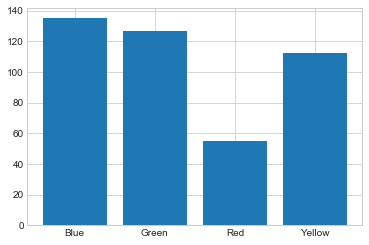

In [142]:
print(gb.mean())

bg_mean  = gb.mean()
plt.bar(range(len(bg_mean.index)), bg_mean['Price'])
plt.xticks(range(len(bg_mean.index)), bg_mean.index)
plt.show()

        count        mean        std    min     25%    50%     75%    max
Color                                                                    
Blue      2.0  135.000000  21.213203  120.0  127.50  135.0  142.50  150.0
Green     3.0  126.666667   5.773503  120.0  125.00  130.0  130.00  130.0
Red       2.0   55.000000   7.071068   50.0   52.50   55.0   57.50   60.0
Yellow    2.0  112.500000   3.535534  110.0  111.25  112.5  113.75  115.0



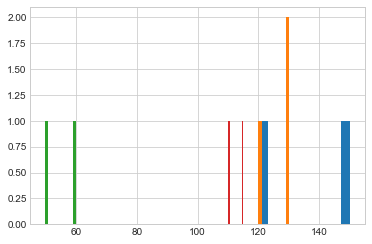

In [143]:
gb = df.groupby(['Color'])['Price']
print(gb.describe())
print()

gb.hist()
plt.show()

In [144]:
gb = df.groupby(['Color', 'Count'])['Price']
print(gb.describe())
print()

              count   mean       std    min    25%    50%    75%    max
Color  Count                                                           
Blue   3        1.0  120.0       NaN  120.0  120.0  120.0  120.0  120.0
       5        1.0  150.0       NaN  150.0  150.0  150.0  150.0  150.0
Green  1        1.0  130.0       NaN  130.0  130.0  130.0  130.0  130.0
       3        2.0  125.0  7.071068  120.0  122.5  125.0  127.5  130.0
Red    2        1.0   50.0       NaN   50.0   50.0   50.0   50.0   50.0
       10       1.0   60.0       NaN   60.0   60.0   60.0   60.0   60.0
Yellow 2        1.0  110.0       NaN  110.0  110.0  110.0  110.0  110.0
       3        1.0  115.0       NaN  115.0  115.0  115.0  115.0  115.0



## 分段（分桶）cut
## HW11

In [145]:
data_array = [[30, 1], 
              [32, 1],
              [18, 0], 
              [55, 1], 
              [70, 0],
              [12, 0],
              [25, 1],
              [28, 1],
              [41, 1],
              [85, 1],]
df = DataFrame(data_array, columns=["Age", "Target"])

df = df.sort_values(by="Age", ascending=False).reset_index(drop=True)
print(df)

   Age  Target
0   85       1
1   70       0
2   55       1
3   41       1
4   32       1
5   30       1
6   28       1
7   25       1
8   18       0
9   12       0


In [153]:
categorical = pd.cut(df['Age'].values, bins=[-np.inf, 20, 40, 60, 80, 100, np.inf], include_lowest=True)
print(type(categorical))
print()

print(categorical)
print()

print(categorical.value_counts())
print()

<class 'pandas.core.arrays.categorical.Categorical'>

[(80.0, 100.0], (60.0, 80.0], (40.0, 60.0], (40.0, 60.0], (20.0, 40.0], (20.0, 40.0], (20.0, 40.0], (20.0, 40.0], (-inf, 20.0], (-inf, 20.0]]
Categories (6, interval[float64]): [(-inf, 20.0] < (20.0, 40.0] < (40.0, 60.0] < (60.0, 80.0] < (80.0, 100.0] < (100.0, inf]]

(-inf, 20.0]     2
(20.0, 40.0]     4
(40.0, 60.0]     2
(60.0, 80.0]     1
(80.0, 100.0]    1
(100.0, inf]     0
dtype: int64



   Age  Target      Age_Group
0   85       1  (80.0, 100.0]
1   70       0   (60.0, 80.0]
2   55       1   (40.0, 60.0]
3   41       1   (40.0, 60.0]
4   32       1   (20.0, 40.0]
5   30       1   (20.0, 40.0]
6   28       1   (20.0, 40.0]
7   25       1   (20.0, 40.0]
8   18       0   (-inf, 20.0]
9   12       0   (-inf, 20.0]


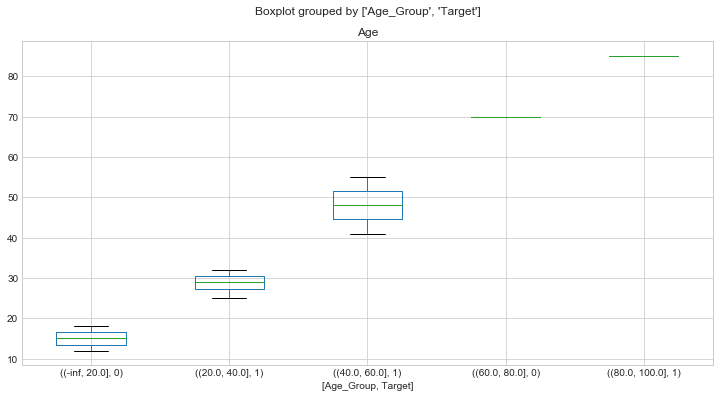

In [154]:
df['Age_Group'] = categorical
print(df)

df.boxplot(column=['Age'], by = ['Age_Group', 'Target'], figsize=(12,6))
plt.show()

## HW12

In [155]:
data_array = [[30, 1], 
              [32, 1],
              [18, 0], 
              [55, 1], 
              [70, 0],
              [12, 0],
              [25, 1],
              [28, 1],
              [41, 1],
              [85, 1],]
df = DataFrame(data_array, columns=["Age", "Target"])
print(df)

   Age  Target
0   30       1
1   32       1
2   18       0
3   55       1
4   70       0
5   12       0
6   25       1
7   28       1
8   41       1
9   85       1


### 等寬劃分 cut

In [156]:
categorical_equal = pd.cut(df['Age'], 4)
print(categorical_equal.value_counts())

(11.927, 30.25]    5
(66.75, 85.0]      2
(30.25, 48.5]      2
(48.5, 66.75]      1
Name: Age, dtype: int64


### 等頻劃分 qcut

In [157]:
categorical_equal = pd.qcut(df['Age'], 4)
print(categorical_equal.value_counts())

(51.5, 85.0]       3
(11.999, 25.75]    3
(31.0, 51.5]       2
(25.75, 31.0]      2
Name: Age, dtype: int64


### 自訂 bin

In [158]:
rule = [-np.inf, 20, 40, 60, 80, 100, np.inf]
print(rule)
print()

rule = np.linspace(-20, 120, num = 8)
print(rule)

categorical = pd.cut(df['Age'].values, bins=rule, include_lowest=True)
print(categorical.value_counts())

[-inf, 20, 40, 60, 80, 100, inf]

[-20.   0.  20.  40.  60.  80. 100. 120.]
(-20.001, 0.0]    0
(0.0, 20.0]       2
(20.0, 40.0]      4
(40.0, 60.0]      2
(60.0, 80.0]      1
(80.0, 100.0]     1
(100.0, 120.0]    0
dtype: int64


# 儲存數據：

In [159]:
data_array = [["Taiwan",0.26], 
              ["China",13.93], 
              ["USA", 3.29], 
              ["Japan", 1.26]]
df = DataFrame(data_array, columns=["國家", "人口"])
print(df)

       國家     人口
0  Taiwan   0.26
1   China  13.93
2     USA   3.29
3   Japan   1.26


In [160]:
df.to_csv('test.csv', index=False)

## HW16
## 將 home_credit.csv 上傳到 Kaggle

https://www.kaggle.com/c/home-credit-default-risk

點選 Leaderboard，按 Late Submission